# Propagación de la afinidad...

In [72]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [73]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(n_samples = 300, centers = centers, cluster_std = 0.5, random_state = 0)

In [74]:
import matplotlib.pyplot as plt
from itertools import cycle

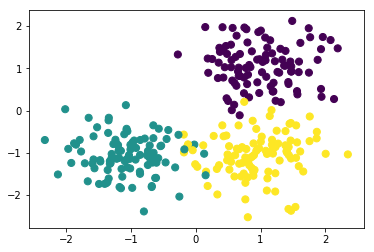

In [75]:
plt.scatter(X[:, 0], X[:, 1], s = 50, c = labels)

In [76]:
# Creación del modelo de propagación de la afinidad.
af = AffinityPropagation(preference = -50).fit(X)

In [77]:
cluster_centers_id = af.cluster_centers_indices_
print(cluster_centers_id)

[160 250 272]


In [78]:
labels = af.labels_
labels

array([0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1], d

In [79]:
n_clust = len(cluster_centers_id)
n_clust

3

In [86]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference = -50).fit(X)
    cluster_centers_ids = af.cluster_centers_indices_
    n_clust = len(cluster_centers_ids)
    clust_labels = af.labels_
    print("Número estimado de clusters: %d" %n_clust)
    print("Homogeneidad: %0.3f" %metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f" %metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f" %metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f" %metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mútua ajustada: %0.3f" %metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f" %metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize = (16, 9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels == k)
        clust_center = X[cluster_centers_ids[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor = col, markersize = 14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
            
    plt.title("Número estimado de clusters %d" %n_clust)
    plt.show()

Número estimado de clusters: 3
Homogeneidad: 1.000
Completitud: 1.000
V-measure: 1.000
R2 ajustado: 1.000
Información mútua ajustada: 1.000
Coeficiente de la silueta: 0.753


c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


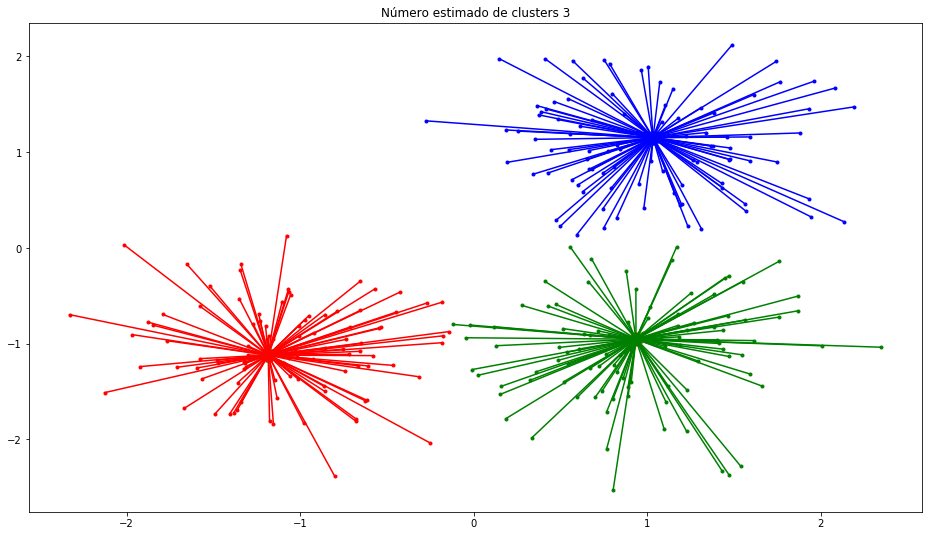

In [87]:
report_affinity_propagation(X)